In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

In [2]:
sns.set_style('white')
sns.set(rc={'figure.figsize':(12,8)})

In [4]:
def load_json_item(path,columns=['title','category']):
    data = []
    with open(path,'r',encoding='utf-8') as f:
        for line in f:
            data.append({k:v for k,v in json.loads(line).items() if k in columns})
    return pd.DataFrame(data,columns=columns)

In [9]:
path = '../src/items.json'
dff = load_json_item(path)
dff['category'] = dff['category'].apply(lambda x: x.lower())
dff.head()

,title,category
0,"Pence, Tiptoeing Away From Trump, Lays Groundw...",politics
1,Jan. 6 Inquiry Presses Republican Lawmaker Abo...,politics
2,A Conservative Lawyer’s New Target After Abort...,politics
3,Key Witness in Durham Case Offers Detailed Tes...,politics
4,Supreme Court Limits Inmates’ Challenges Based...,politics


In [13]:
df = pd.concat([df,dff])

In [14]:
df.head()

,title,category
0,There Were 2 Mass Shootings In Texas Last Week...,crime
1,Will Smith Joins Diplo And Nicky Jam For The 2...,entertainment
2,Hugh Grant Marries For The First Time At Age 57,entertainment
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,entertainment
4,Julianna Margulies Uses Donald Trump Poop Bags...,entertainment


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'arts'),
  Text(1, 0, 'arts & culture'),
  Text(2, 0, 'black voices'),
  Text(3, 0, 'business'),
  Text(4, 0, 'college'),
  Text(5, 0, 'comedy'),
  Text(6, 0, 'crime'),
  Text(7, 0, 'culture & arts'),
  Text(8, 0, 'divorce'),
  Text(9, 0, 'education'),
  Text(10, 0, 'entertainment'),
  Text(11, 0, 'environment'),
  Text(12, 0, 'fifty'),
  Text(13, 0, 'food & drink'),
  Text(14, 0, 'good news'),
  Text(15, 0, 'green'),
  Text(16, 0, 'health'),
  Text(17, 0, 'healthy living'),
  Text(18, 0, 'home & living'),
  Text(19, 0, 'impact'),
  Text(20, 0, 'latino voices'),
  Text(21, 0, 'media'),
  Text(22, 0, 'mediaandadvertising'),
  Text(23, 0, 'money'),
  Text(24, 0, 'parenting'),
  Text(25, 0, 'parents'),
  Text(26, 0, 'politics'),
  Text(27, 0, 'queer voices'),
  Text(28, 0, 'rel

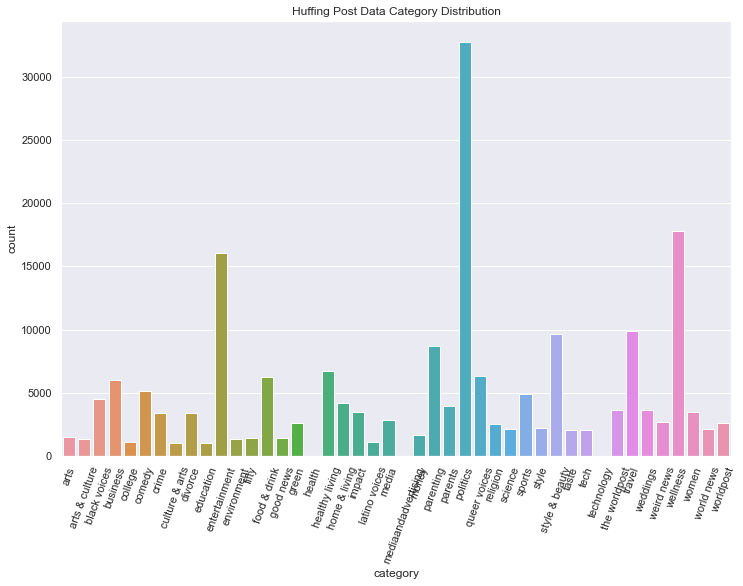

In [15]:
dff= df.groupby('category').count().reset_index()
dff.columns = ['category','count']
plt.title('Huffing Post Data Category Distribution')
sns.barplot(x="category", y="count", data=dff)
plt.xticks(rotation=70)

In [16]:
len(df)

201059

In [ ]:
df['apply']

In [14]:
## preprocess

In [17]:
# %pip install -U spacy

In [18]:
import spacy
stop_words = set(pd.read_csv('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words',
                             header=None,
                             squeeze=True).tolist())

In [17]:
def clean_doc(d):
    doc = []
    for t in d:
        # t.is_punct,
        if not any([t.is_stop, t.is_digit, not t.is_alpha,  t.is_space, t.lemma_ == '-PRON-']):        
            doc.append(t.lemma_)
    return ' '.join(doc)    

In [19]:
# !python -m spacy download en_core_web_sm
import spacy

In [20]:
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 6000000
# nlp.disable_pipes('ner')
# # nlp.disable_pipes('tok2vec')
# nlp.disable_pipes('attribute_ruler')
# nlp.disable_pipes('lemmatizer')

In [59]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [21]:
def preprocess(articles):
    iter_articles = (article for article in articles)
    clean_articles = []
    for i, doc in enumerate(nlp.pipe(iter_articles, 
                                     batch_size=100, 
                                     n_process=8), 1):
        if i % 1000 == 0:
            print(f'{i / len(articles):.2%}', end=' ', flush=True)
        clean_articles.append(clean_doc(doc))
    return clean_articles

In [22]:
df['cleanTitle'] = preprocess(df['title'])

0.50% 0.99% 1.49% 1.99% 2.49% 2.98% 3.48% 3.98% 4.48% 4.97% 5.47% 5.97% 6.47% 6.96% 7.46% 7.96% 8.46% 8.95% 9.45% 9.95% 10.44% 10.94% 11.44% 11.94% 12.43% 12.93% 13.43% 13.93% 14.42% 14.92% 15.42% 15.92% 16.41% 16.91% 17.41% 17.91% 18.40% 18.90% 19.40% 19.89% 20.39% 20.89% 21.39% 21.88% 22.38% 22.88% 23.38% 23.87% 24.37% 24.87% 25.37% 25.86% 26.36% 26.86% 27.36% 27.85% 28.35% 28.85% 29.34% 29.84% 30.34% 30.84% 31.33% 31.83% 32.33% 32.83% 33.32% 33.82% 34.32% 34.82% 35.31% 35.81% 36.31% 36.81% 37.30% 37.80% 38.30% 38.79% 39.29% 39.79% 40.29% 40.78% 41.28% 41.78% 42.28% 42.77% 43.27% 43.77% 44.27% 44.76% 45.26% 45.76% 46.26% 46.75% 47.25% 47.75% 48.24% 48.74% 49.24% 49.74% 50.23% 50.73% 51.23% 51.73% 52.22% 52.72% 53.22% 53.72% 54.21% 54.71% 55.21% 55.71% 56.20% 56.70% 57.20% 57.69% 58.19% 58.69% 59.19% 59.68% 60.18% 60.68% 61.18% 61.67% 62.17% 62.67% 63.17% 63.66% 64.16% 64.66% 65.16% 65.65% 66.15% 66.65% 67.14% 67.64% 68.14% 68.64% 69.13% 69.63% 70.13% 70.63% 71.12% 71.62% 72.12% 72.62

In [31]:
from nltk.tokenize import sent_tokenize, word_tokenize
# df['number_of_sentences'] = df['title'].apply(lambda x : len(sent_tokenize(x)))


In [3]:
df = pd.read_csv('../data/khabarOnline/khabar_cleaned.csv')
df.head()

,Unnamed: 0,text,cleaned_comment
0,0,اولین تصویر از لندرور هیدروژنی +عکس - خبر ثریا,اولین تصویر از لندرور هیدروژنی +عکس - خبر ثریا
1,1,ستاره‌ای که از سفر مرگ پیاده شد پیتزا سفارش دا...,ستاره‌ای که از سفر مرگ پیاده شد پیتزا سفارش دا...
2,2,انتقادات تند دبیر کمیته صنعت ستاد حجت الاسلام ...,انتقادات تند دبیر کمیته صنعت ستاد حجت الاسلام ...
3,3,توقیف پراید با ۱۸۹ کیلو تریاک | خبر روز,توقیف پراید با ۱۸۹ کیلو تریاک | خبر روز
4,4,پليس راه استان البرز | سایت خبری کرج رسا,پلیس راه استان البرز | سایت خبری کرج رسا


In [4]:
from hazm import word_tokenize

In [5]:
unique_words = []
df['text'].apply(lambda x : unique_words.append(set(word_tokenize(x))))

0         None
1         None
2         None
3         None
4         None
          ... 
237345    None
237346    None
237347    None
237348    None
237349    None
Name: text, Length: 237350, dtype: object

In [6]:
len(set([e for l in unique_words for e in l ]))

78498

In [7]:
len([e for l in unique_words for e in l ])

2876847

In [11]:
sum(df['word_count'])

3032684

In [14]:
len(df)

237350

In [10]:
df['word_count'] = df['text'].apply(lambda x : len(word_tokenize(x)))

<AxesSubplot:title={'center':'word count per news title'}, xlabel='word_count'>

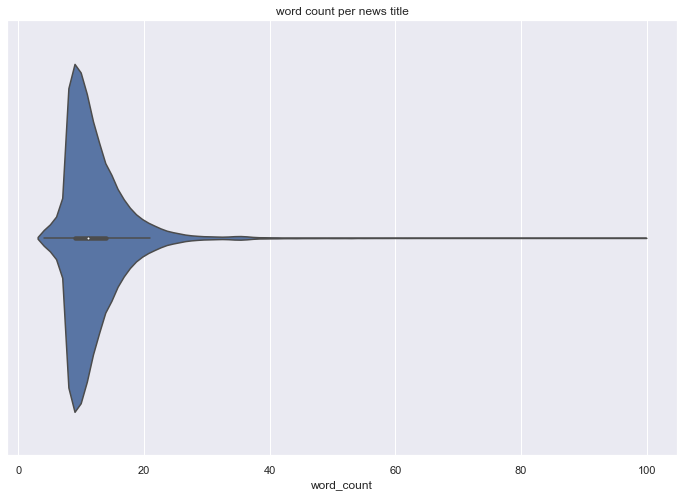

In [13]:
plt.title('word count per news title')
sns.violinplot(x=df[df['word_count']<100]['word_count'])

In [105]:
df[['title','category']].to_csv('../data/rawHuffingPostGathered.csv')

In [106]:
df[['cleanTitle','category']].to_csv('../data/cleanedHuffingPostGathered.csv')

In [97]:
for i,r in df.iterrows():
    print(f"raw: {r['headline']}")
    print(f"cleaned: {r['cleanTitle']}")
    print('----------------')
    if i>10:
        break

raw: There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV
cleaned: Mass Shootings Texas week tv
----------------
raw: Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song
cleaned: Smith Joins Diplo Nicky Jam World Cup Official Song
----------------
raw: Hugh Grant Marries For The First Time At Age 57
cleaned: Hugh Grant Marries time Age
----------------
raw: Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork
cleaned: Jim Carrey Blasts Castrato Adam Schiff Democrats New Artwork
----------------
raw: Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog
cleaned: Julianna Margulies use Donald Trump Poop bag pick Dog
----------------
raw: Morgan Freeman 'Devastated' That Sexual Harassment Claims Could Undermine Legacy
cleaned: Morgan Freeman devastate Sexual Harassment claim undermine Legacy
----------------
raw: Donald Trump Is Lovin' New McDonald's Jingle In 'Tonight Show' Bit
cleaned: Donald Trump New McDonald Jingl

In [107]:
sum(df['title'].apply(lambda x: len(x.split())))

18003

In [98]:
from collections import Counter
docs = df['cleanTitle'].tolist()
article_length, token_count = [], Counter()
for i, doc in enumerate(docs, 1):
    if i % 1e6 == 0:
        print(i, end=' ', flush=True)
    d = doc.lower().split()
    article_length.append(len(d))
    token_count.update(d)

In [35]:
sns.set_palette("Purples_r")

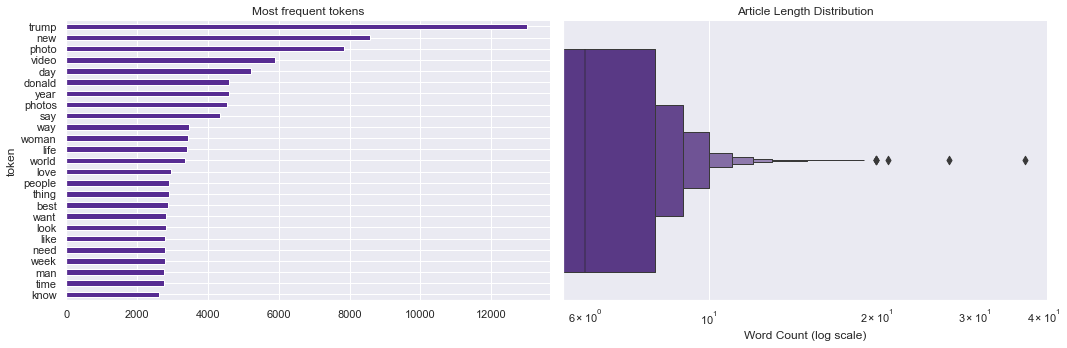

In [99]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
(pd.DataFrame(token_count.most_common(), columns=['token', 'count'])
 .pipe(lambda x: x[~x.token.str.lower().isin(stop_words)])
 .set_index('token')
 .squeeze()
 .iloc[:25]
 .sort_values()
 .plot
 .barh(ax=axes[0], title='Most frequent tokens'))
sns.boxenplot(x=pd.Series(article_length), ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_xlabel('Word Count (log scale)')
axes[1].set_title('Article Length Distribution')
sns.despine()
fig.tight_layout()
# fig.savefig(results_path / 'fn_explore', dpi=300);

In [7]:
## load dataset
path = '../../data/News_Category_Dataset_v2.json'
df = load_json_item(path,['headline','category'])

In [8]:
df.head()
df['category'] = df['category'].apply(lambda x: x.lower())

In [90]:
df.head()

,headline,category
0,There Were 2 Mass Shootings In Texas Last Week...,crime
1,Will Smith Joins Diplo And Nicky Jam For The 2...,entertainment
2,Hugh Grant Marries For The First Time At Age 57,entertainment
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,entertainment
4,Julianna Margulies Uses Donald Trump Poop Bags...,entertainment


In [121]:
df = pd.read_csv('../../data/khabar.csv',lineterminator='\n',usecols=['title','cats'])

In [123]:
df['category'] = df['cats'].apply(lambda x: int(eval(x)[0]) if eval(x)!=[] else None)
df = df.dropna()

In [131]:
df['category'] = df['category'].apply(lambda x: mapped_category_title[x])

In [135]:
import arabic_reshaper
from bidi.algorithm import get_display


In [1]:
dff= df[['title','category']].groupby('category').count().reset_index()
dff.columns = ['category','count']
dff['category'] = dff['category'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
plt.title('Huffing Post Data Set Category Distribution')
sns.barplot(x="category", y="count", data=dff)
plt.xticks(rotation=70)

NameError: name 'df' is not defined